In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch
#plt.style.use('dark_background')
%matplotlib inline

In [2]:
df = pd.read_parquet("data.parquet")
df

,U,Y
0,"[7.5711866919619e-09, -8.077820159373228e-08, ...","[2.5213164194278225e-09, -1.5235097418057014e-..."
1,"[-3.7823776833237245e-08, 8.627213405876836e-0...","[-5.147116622400686e-10, -3.9268506817779083e-..."
2,"[-1.2695501611083047e-07, -2.7016263945860308e...","[-3.9611775344077424e-08, -3.640652091633418e-..."
3,"[3.977487811628516e-09, -4.9884758386715634e-0...","[-8.089064588858389e-08, -2.9237628828699072e-..."
4,"[-3.9907215686230506e-08, 1.865186457671578e-0...","[-6.41647952019521e-08, -3.0282985679954072e-0..."
...,...,...
80995,"[-8.615139882308585e-08, 3.1435569617081813e-0...","[-1.0407318262130762e-07, -1.0778232480419377e..."
80996,"[3.989975710983449e-09, 2.6590951814189844e-08...","[-7.863754243739806e-08, -6.367445643777342e-0..."
80997,"[-1.4182187427222168e-07, 7.336774329588124e-0...","[-5.397401192905898e-08, 1.0443592584378836e-0..."
80998,"[-1.5716984043894282e-07, -6.906919906510315e-...","[-8.622169176603814e-08, 3.9403023440739806e-0..."


In [3]:
t = 1e3*np.arange(df.shape[0]-1000)/8000
u = np.vstack(df["U"])[1000:]
y = np.vstack(df["Y"])[1000:]

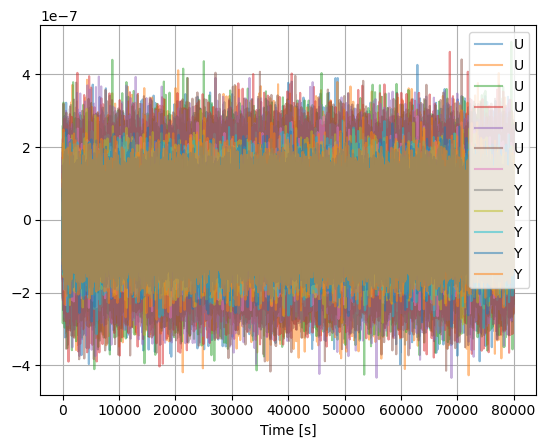

In [104]:
fig,ax = plt.subplots()
ax.plot(u,alpha=0.5,label="U")
ax.plot(y,alpha=0.5,label="Y")
ax.grid()
ax.set_xlabel('Time [s]')
ax.legend()

In [105]:
nu.shape,psd_u.shape

((1001,), (6, 1001))

In [4]:
nu,psd_u = welch(u.T,fs=8000, nperseg=1000*4)
nu,psd_y = welch(y.T,fs=8000, nperseg=1000*4)
tf_db = 10*np.log10(psd_y/psd_u).T

In [38]:

#np.savez("ASMS_TF.npz",nu=nu,tf_db=tf_db)

In [6]:
data = np.load("ASMS_TF.npz")
nu = data['nu']
tf_db = data['tf_db']

In [ ]:
fig,ax = plt.subplots()
ax.loglog(nu,psd_u.T,label="U")
ax.loglog(nu,psd_y.T,label="Y")
ax.grid()
ax.set_xlabel('Frequency [Hz]')
ax.legend()

In [37]:
10*np.log10(0.125)

-9.030899869919436

In [51]:
400*25e-3

10.0

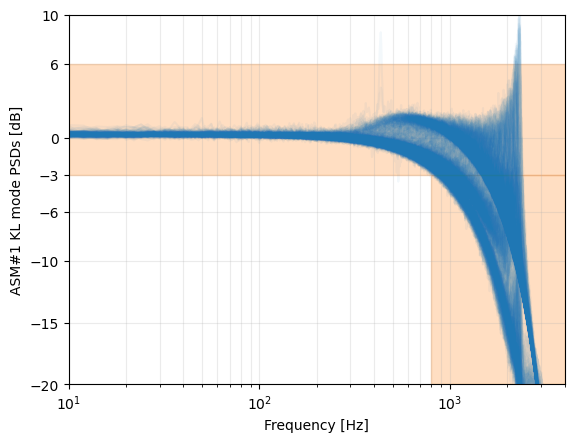

In [5]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db,"C0",alpha=0.05)
ax.grid(which='both',alpha=0.25)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("ASM#1 KL mode PSDs [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
ax.set_yticks([-20,-15,-10,-3,0,-6,6,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

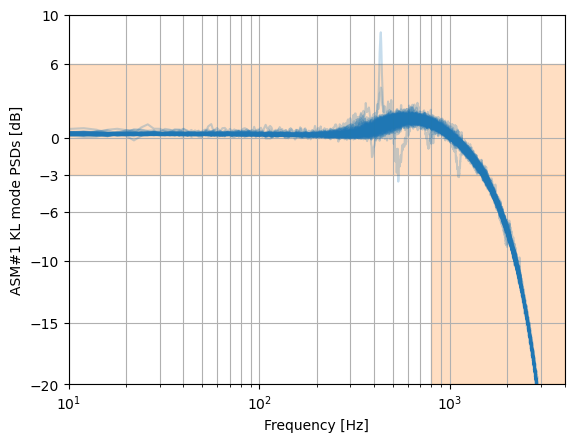

In [6]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,:66],"C0",alpha=0.25)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("ASM#1 KL mode PSDs [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
ax.set_yticks([-20,-15,-10,-3,0,-6,6,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

In [190]:
n = 25
(n+1)*(n+2)/2

351.0

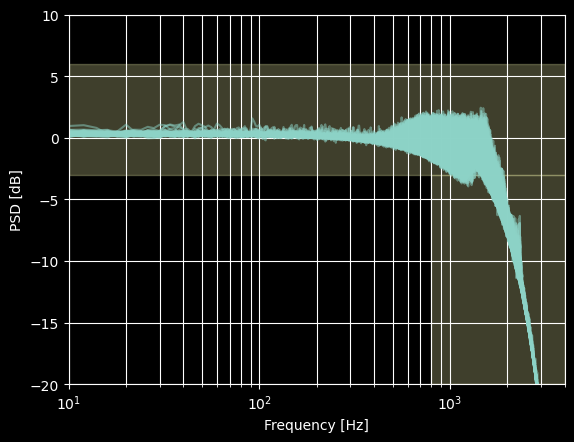

In [220]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,66:231],"C0",alpha=0.5)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

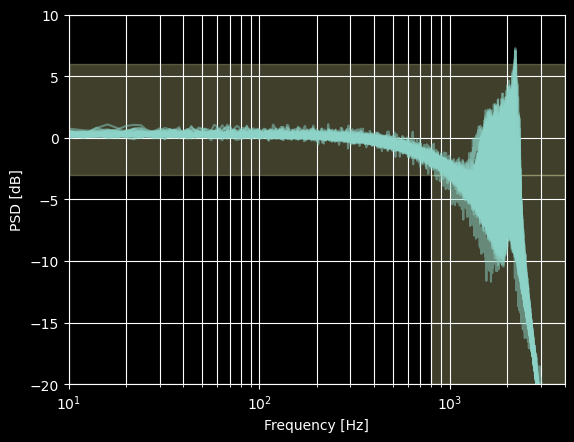

In [221]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,231:351],"C0",alpha=0.5)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

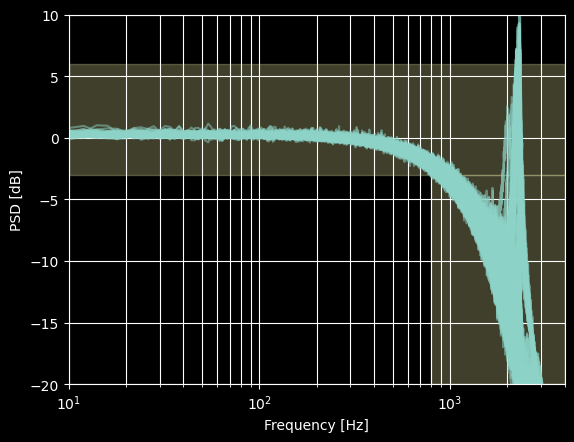

In [222]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,351:],"C0",alpha=0.5)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

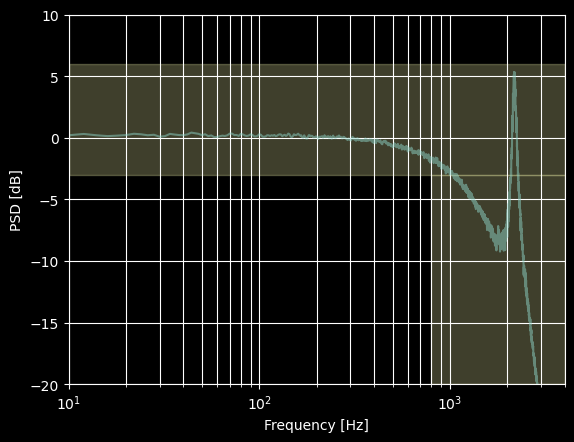

In [255]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,347],"C0",alpha=0.5)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

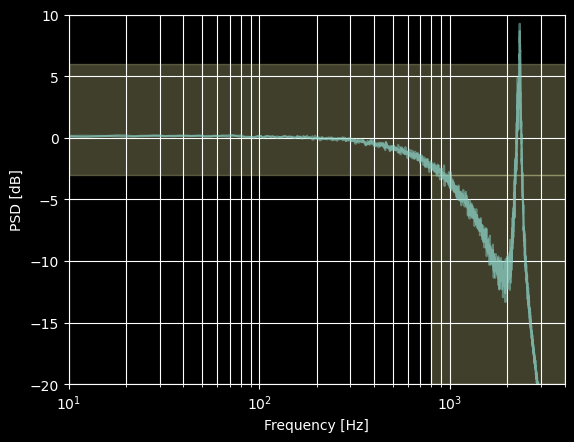

In [238]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,416:418],"C0",alpha=0.5)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

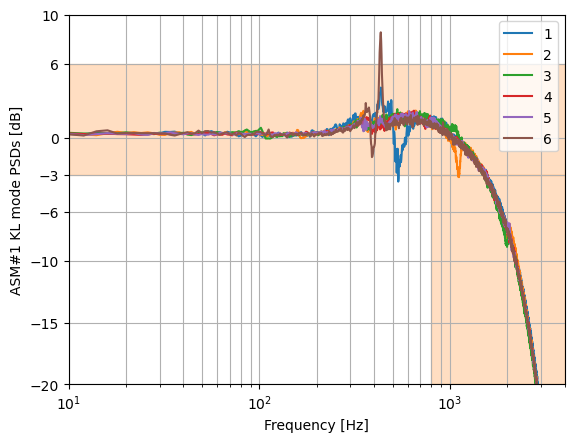

In [7]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,:6])
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("ASM#1 KL mode PSDs [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
ax.legend(list(range(1,tf_db.shape[0]+1)))
ax.set_yticks([-20,-15,-10,-3,0,-6,6,10])
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

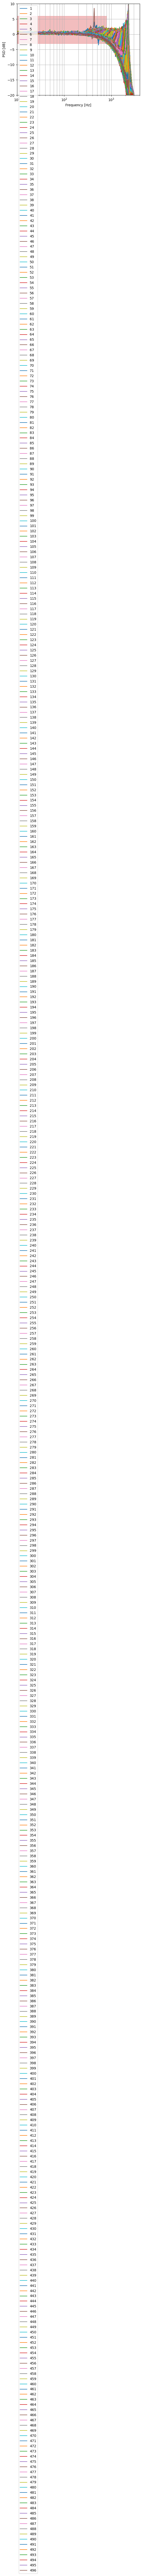

In [8]:
fig,ax = plt.subplots()
ax.semilogx(nu,10*np.log10(psd_y/psd_u).T)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,800],[-3, -3],6,color="C3",alpha=0.3)


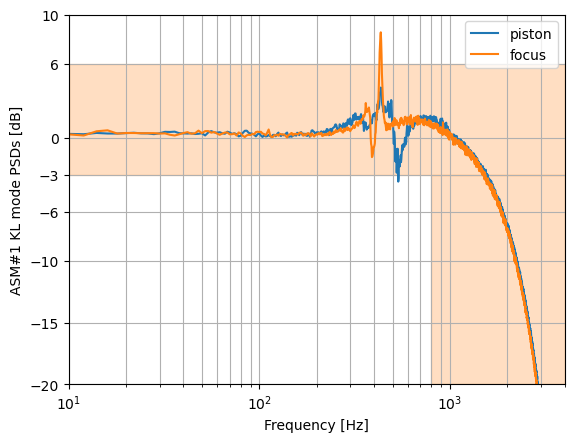

In [10]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,0],label="piston")
ax.semilogx(nu,tf_db[:,5],label="focus")
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("ASM#1 KL mode PSDs [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
ax.legend()
ax.set_yticks([-20,-15,-10,-3,0,-6,6,10])
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

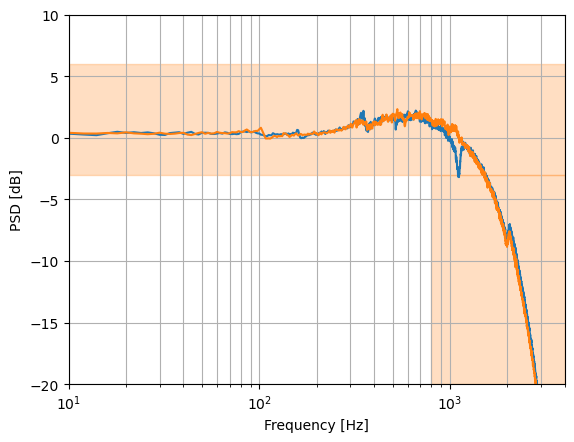

In [11]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,1])
ax.semilogx(nu,tf_db[:,2])
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

(-20.0, 10.0)

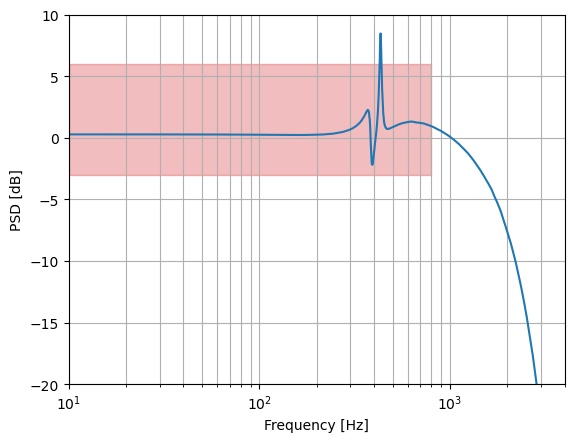

In [ ]:
fig,ax = plt.subplots()
ax.semilogx(nu,10*np.log10(psd_y/psd_u))
ax.fill_between([10,800],[-3, -3],6,color="C3",alpha=0.3)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])

In [6]:
nu[1]

2.0

In [30]:
8000/2000

4.0

In [115]:
80000/2000

40.0

In [121]:
18**2/2,17*18/2

(162.0, 153.0)

In [126]:
8*9/2

36.0

In [13]:
nu[np.argmax(tf_db[:,5])]

434.0